# **Monkey Banana Problem**

### **Problem Description**

<small style="font-size: 15px;">

**State Representation:** 

A state is represented by the monkey's current position, the positions of bananas, and the table’s position on a 2D grid. Each tile can be empty, contain a banana, contain the table, or have the monkey.

**Initial State:**

The monkey starts at the top-left corner of the board. Bananas are placed at random positions on the board, while the table is manually placed by the user on a tile that is not already occupied by the monkey or any banana.

**Goal State:**  

The monkey successfully reaches the table and then finds and eats all bananas.

**Actions:**  

The allowed actions involve,
- Search for the table.

- Move to the table.

- Climb the table.

- Identify the closest banana.

- Move toward the banana.

- Eat the banana.

**Transition Model:**  

The transition model defines how the monkey’s state changes based on its actions. 

**Path Cost:**  

Each tile moved costs 1. Total cost is the sum of steps to reach the table plus the steps needed to collect all bananas in sequence.

**Solution Approach:**  

The monkey-banana simulation operates within an N×N grid, where different tiles represent the monkey, table, and scattered bananas. The objective is for the monkey to search for the table, climb it, and then systematically locate and consume all the bananas placed across the board. The board is initialized as a NumPy matrix, with the monkey starting at a fixed position while bananas are randomly placed based on user input. The table is manually positioned by the user, ensuring it does not overlap with the monkey or banana locations. The monkey first searches for the table by scanning the grid step by step, moving toward its position and climbing it once found. The search for bananas follows a greedy strategy, where the monkey identifies the closest banana using the Manhattan Distance heuristic and moves efficiently to collect it. Once a banana is consumed, the board updates to reflect the progress, and the process repeats until all bananas are eaten. The simulation provides a visual representation of each step, displaying the monkey’s movement, table placement, and banana consumption. This behavior represents a goal-based agent, executing predefined actions systematically to achieve its objective. 

</small>

### **Implementation**

Enter the size of the grid (number of rows and columns, must be positive): 
5


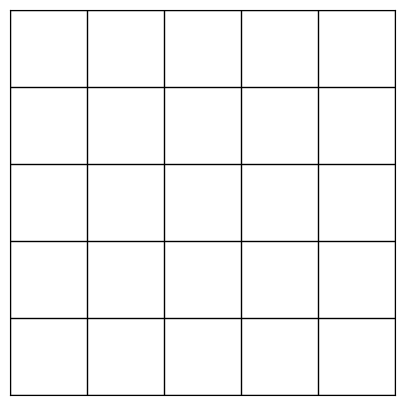

Board of size 5 is created.
Monkey is at index 1.


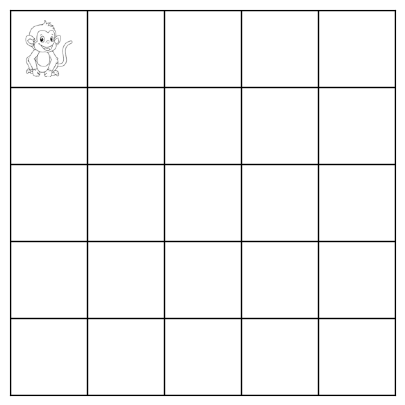

How many tiles should have bananas? (0-25): 
10
Bananas added to 10 tiles on the board.
Bananas are placed at the following indexes: 23, 17, 3, 21, 18, 7, 24, 14, 12, 2


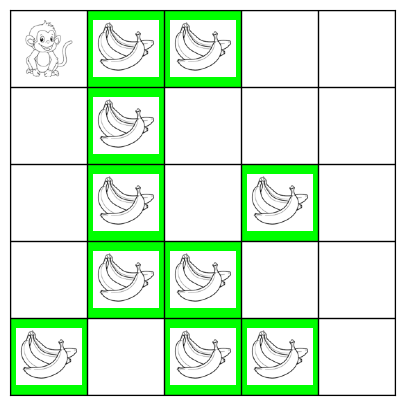

Enter the tile index (1-25) to place the table: 
10
Table placed at index 10.


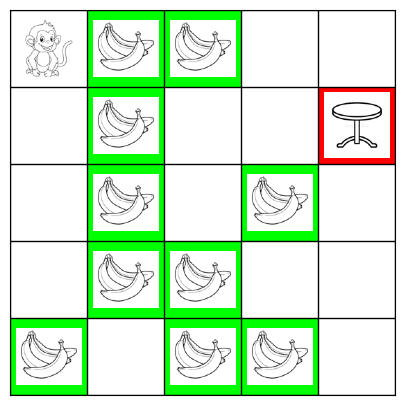

Monkey is searching for a table at index 1.
Monkey is searching for a table at index 2.
Monkey is searching for a table at index 3.
Monkey is searching for a table at index 4.
Monkey is searching for a table at index 5.
Monkey is searching for a table at index 6.
Monkey is searching for a table at index 7.
Monkey is searching for a table at index 8.
Monkey is searching for a table at index 9.
Monkey is searching for a table at index 10.
Monkey found the table at index 10.


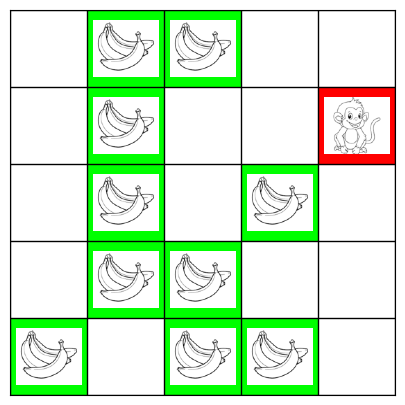

Monkey will now start searching for bananas.
Monkey is searching for bananas and found one at index 14.
Monkey is eating the banana at index 14.


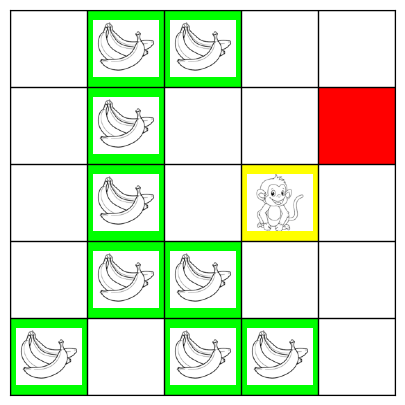

Monkey is searching for bananas and found one at index 18.
Monkey is eating the banana at index 18.


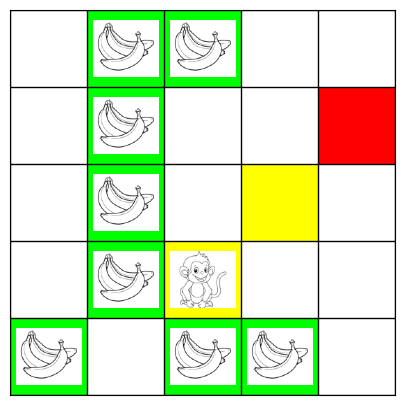

Monkey is searching for bananas and found one at index 23.
Monkey is eating the banana at index 23.


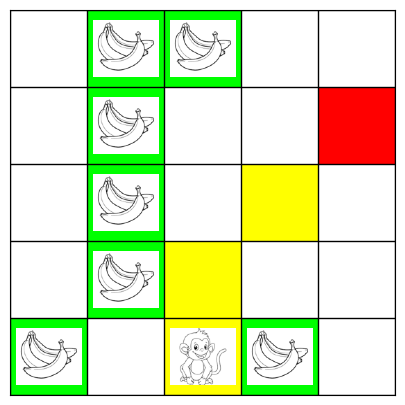

Monkey is searching for bananas and found one at index 24.
Monkey is eating the banana at index 24.


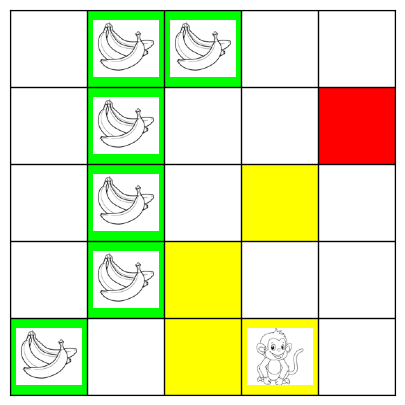

Monkey is searching for bananas and found one at index 17.
Monkey is eating the banana at index 17.


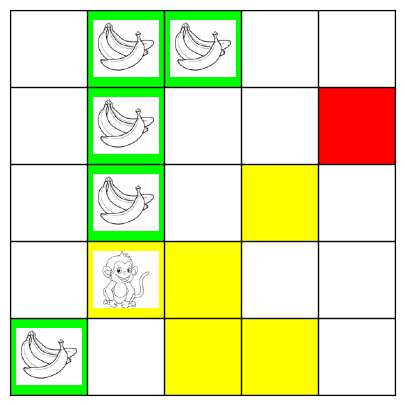

Monkey is searching for bananas and found one at index 12.
Monkey is eating the banana at index 12.


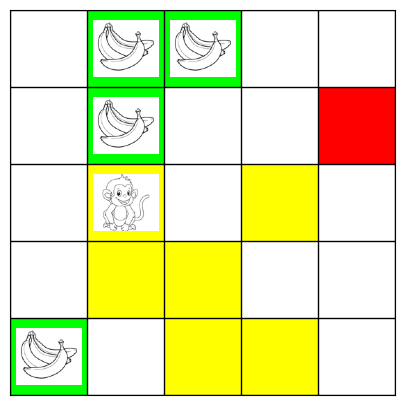

Monkey is searching for bananas and found one at index 7.
Monkey is eating the banana at index 7.


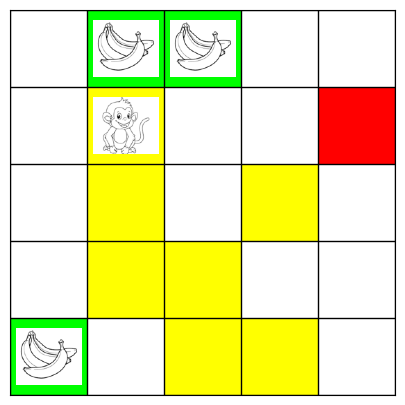

Monkey is searching for bananas and found one at index 2.
Monkey is eating the banana at index 2.


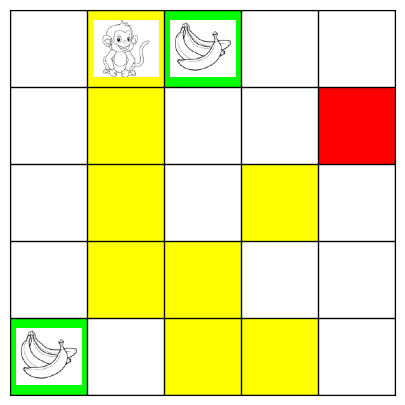

Monkey is searching for bananas and found one at index 3.
Monkey is eating the banana at index 3.


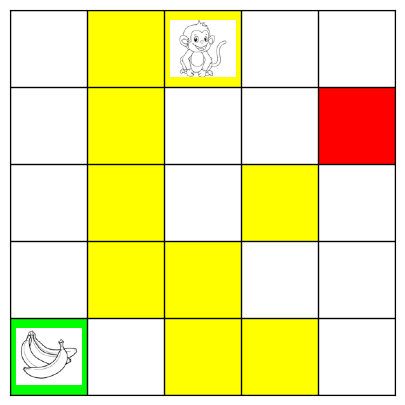

Monkey is searching for bananas and found one at index 21.
Monkey is eating the banana at index 21.


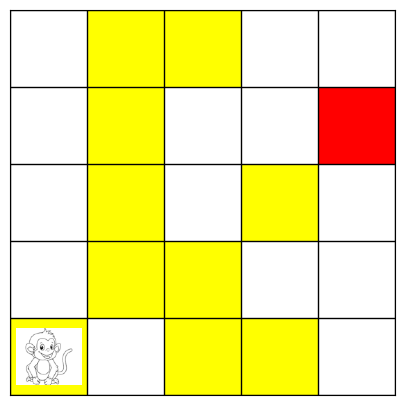

Monkey has eaten all the bananas.


In [2]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random
def display_board(board_matrix, size):
    fig, ax = plt.subplots(figsize=(size, size))
    ax.imshow(board_matrix, interpolation='nearest')
    ax.set_xticks(np.arange(-0.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, size, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()
def create_empty_board(size):
    board_matrix = np.ones((size, size, 3))  
    return board_matrix
def place_monkey_on_board(board_matrix):
    monkey_position = 0  
    return monkey_position
def add_bananas_to_board(board_matrix, size, banana_count):
    banana_positions = random.sample(range(size * size), banana_count)
    for pos in banana_positions:
        row = pos // size
        col = pos % size
        board_matrix[row, col] = [0, 1, 0]  
    return board_matrix, banana_positions
def add_table_to_board(board_matrix, size, monkey_position, banana_positions):
    table_placed = False
    while not table_placed:
        try:
            print(f"Enter the tile index (1-{size * size}) to place the table: ")
            table_index = int(input())
            print(table_index)
            if 1 <= table_index <= size * size:
                table_index -= 1
                row = table_index // size
                col = table_index % size
                if table_index == monkey_position:
                    print("The monkey is already placed at this tile. Choose a different tile.")
                elif table_index in banana_positions:
                    print("A banana is already placed at this tile. Choose a different tile.")
                else:
                    board_matrix[row, col] = [1, 0, 0]  
                    table_placed = True
                    print(f"Table placed at index {table_index + 1}.")
            else:
                print(f"Invalid index. Please enter a number between 1 and {size * size}.")
        except ValueError:
            print("Invalid input. Please enter a valid integer for the tile index.")
    return board_matrix, table_index
def display_board_with_images(board_matrix, size, monkey_position, banana_positions, banana_image_path, table_position=None):
    fig, ax = plt.subplots(figsize=(size, size))
    ax.imshow(board_matrix, interpolation='nearest')
    ax.set_xticks(np.arange(-0.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, size, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    monkey_image_path = "monkey.png"  
    monkey_image = Image.open(monkey_image_path).convert("RGB")
    monkey_image.thumbnail((95, 95))
    banana_image = Image.open(banana_image_path).convert("RGB")
    banana_image.thumbnail((95, 95))
    for row in range(size):
        for col in range(size):
            cell_index = row * size + col
            if cell_index == monkey_position and cell_index in banana_positions:
                monkey_box = OffsetImage(monkey_image, zoom=0.5)
                banana_box = OffsetImage(banana_image, zoom=0.5)
                monkey_ab = AnnotationBbox(monkey_box, (col - 0.2, row), frameon=False, box_alignment=(0.5, 0.5))
                ax.add_artist(monkey_ab)
                banana_ab = AnnotationBbox(banana_box, (col + 0.2, row), frameon=False, box_alignment=(0.5, 0.5))
                ax.add_artist(monkey_ab)
                ax.add_artist(banana_ab)
            elif cell_index == monkey_position:
                monkey_box = OffsetImage(monkey_image, zoom=0.5)
                monkey_ab = AnnotationBbox(monkey_box, (col, row), frameon=False, box_alignment=(0.5, 0.5))
                ax.add_artist(monkey_ab)
            elif cell_index in banana_positions:
                banana_box = OffsetImage(banana_image, zoom=0.5)
                banana_ab = AnnotationBbox(banana_box, (col, row), frameon=False, box_alignment=(0.5, 0.5))
                ax.add_artist(banana_ab)
    if table_position:
        row, col = table_position // size, table_position % size
        if monkey_position != table_position:
            table_image_path = "table.png"  
            table_image = Image.open(table_image_path).convert("RGB")
            table_image.thumbnail((95, 95))
            imagebox = OffsetImage(table_image, zoom=0.5)
            ab = AnnotationBbox(imagebox, (col, row), frameon=False, box_alignment=(0.5, 0.5))
            ax.add_artist(ab)
        else:
            ax.add_patch(plt.Rectangle((col - 0.5, row - 0.5), 1, 1, fill=True, color='red', alpha=0.3))
            monkey_box = OffsetImage(monkey_image, zoom=0.5)
            monkey_ab = AnnotationBbox(monkey_box, (col, row), frameon=False, box_alignment=(0.5, 0.5))
            ax.add_artist(monkey_ab)
    plt.show()
def monkey_searches_for_table(board_matrix, size, monkey_position, table_position):
    for i in range(size * size):
        print(f"Monkey is searching for a table at index {i + 1}.")
        if i == table_position:
            monkey_position = i
            print(f"Monkey found the table at index {i + 1}.")
            break
    return monkey_position
def manhattan_distance(pos1, pos2, size):
    x1, y1 = pos1 // size, pos1 % size
    x2, y2 = pos2 // size, pos2 % size
    return abs(x1 - x2) + abs(y1 - y2)
def monkey_searches_for_bananas(board_matrix, size, monkey_position, banana_positions):
    while banana_positions:
        closest_banana = min(banana_positions, key=lambda pos: manhattan_distance(monkey_position, pos, size))
        print(f"Monkey is searching for bananas and found one at index {closest_banana + 1}.")
        monkey_position = closest_banana
        print(f"Monkey is eating the banana at index {closest_banana + 1}.")
        row = monkey_position // size
        col = monkey_position % size
        board_matrix[row, col] = [1, 1, 0]  
        banana_positions.remove(closest_banana) 
        display_board_with_images(board_matrix, size, monkey_position, banana_positions, "banana.png")
    print("Monkey has eaten all the bananas.")
    return monkey_position
try:
    print("Enter the size of the grid (number of rows and columns, must be positive): ")
    size = int(input())
    print(size)
    if size > 0:
        board_matrix = create_empty_board(size)
        display_board(board_matrix, size)
        print(f"Board of size {size} is created.")
        monkey_position = place_monkey_on_board(board_matrix)
        print("Monkey is at index 1.")
        display_board_with_images(board_matrix, size, monkey_position, [], "banana.png")
        print(f"How many tiles should have bananas? (0-{size * size}): ")
        banana_count = int(input())
        print(banana_count)
        board_matrix, banana_positions = add_bananas_to_board(board_matrix, size, banana_count)
        print(f"Bananas added to {banana_count} tiles on the board.")
        print(f"Bananas are placed at the following indexes: {', '.join(map(str, [pos + 1 for pos in banana_positions]))}")
        display_board_with_images(board_matrix, size, monkey_position, banana_positions, "banana.png")
        board_matrix, table_position = add_table_to_board(board_matrix, size, monkey_position, banana_positions)
        display_board_with_images(board_matrix, size, monkey_position, banana_positions, "banana.png", table_position)
        monkey_position = monkey_searches_for_table(board_matrix, size, monkey_position, table_position)
        display_board_with_images(board_matrix, size, monkey_position, banana_positions, "banana.png", table_position)
        print("Monkey will now start searching for bananas.")
        monkey_position = monkey_searches_for_bananas(board_matrix, size, monkey_position, banana_positions)
    else:
        print("Invalid input. Please enter a positive integer.")
except ValueError:
    print("Invalid input. Please enter a valid integer.")